## Parameters


In [27]:
import numpy as np
import matplotlib.pyplot as plt

timestep = 1e-16
gamma = 1e13
P = 10
a = 1
initial_position = np.linspace(2,2,P)
initial_velocities = np.zeros(P)# np.linspace(0,0,100)


iterations = 10000000

## Verlet

In [28]:
from verlet import verlet
from dynamics import energy
import matplotlib.pyplot as plt
from dynamics import k_B, T_0

position, velocity = verlet(
    inital_positions=initial_position,
    initial_velocities=initial_velocities,
    iterations=iterations,
    timestep=timestep,
    gamma=gamma,
    termostat=True,
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9999997/9999997 [07:25<00:00, 22453.06it/s]


In [29]:
positions = np.array(position).transpose()
print(positions)
velocities = np.array(velocity).transpose()

[[2.         1.99995908 1.99986284 ... 0.24965118 0.24909903 0.24858537]
 [2.         2.00002983 1.9999979  ... 0.29898939 0.29881593 0.29861649]
 [2.         1.99997662 1.99999812 ... 0.32072653 0.32110293 0.32148559]
 ...
 [2.         2.00000308 2.00002373 ... 0.42189901 0.4227463  0.42354409]
 [2.         1.99997597 2.00002186 ... 0.46125928 0.46134458 0.4613741 ]
 [2.         1.99998025 2.00000703 ... 0.41662347 0.41648565 0.41630553]]


## Energy

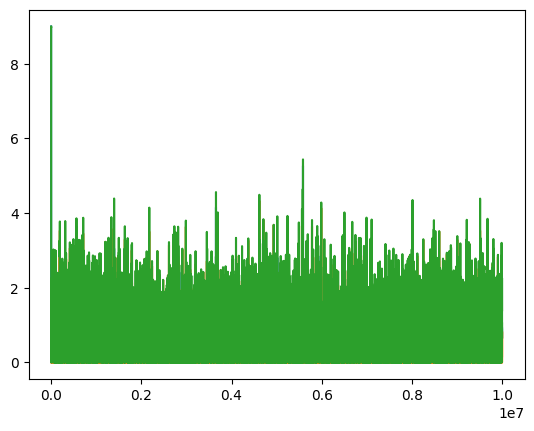

Energie totale moyenne:  0.45331127340614286
Ecart type:  92.40089659890886


In [30]:
position_0 = positions[0]
velocity_0 = velocities[0]
potential_e, kinetic_e = energy(position_0, velocity_0)

energy_totale = potential_e + kinetic_e
plt.plot(potential_e)
plt.plot(kinetic_e)
plt.plot(energy_totale)

plt.show()

print('Energie totale moyenne: ', np.mean(energy_totale))
print('Ecart type: ', np.std(energy_totale, ddof=1) * 100 / np.mean(energy_totale))

10000000
Energie cinétique moyenne:  0.20255798419407547
0.2
gamma 10000000000000.0


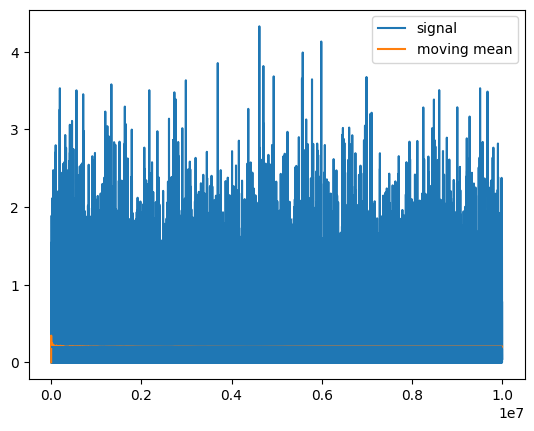

In [31]:
plt.plot(kinetic_e, label="signal")

kinetic_cumsum = np.cumsum(kinetic_e)
iteration = np.arange(1,len(kinetic_e)+1,1)
print(iterations)
kinetic_mean = kinetic_cumsum / iteration

ax = plt.plot(kinetic_mean, label="moving mean")
print("Energie cinétique moyenne: ", np.mean(kinetic_e))
print(0.5 * k_B * T_0)

print("gamma", gamma)
plt.legend()

plt.hlines(y=0.2, xmin=0, xmax=iterations)
plt.show()

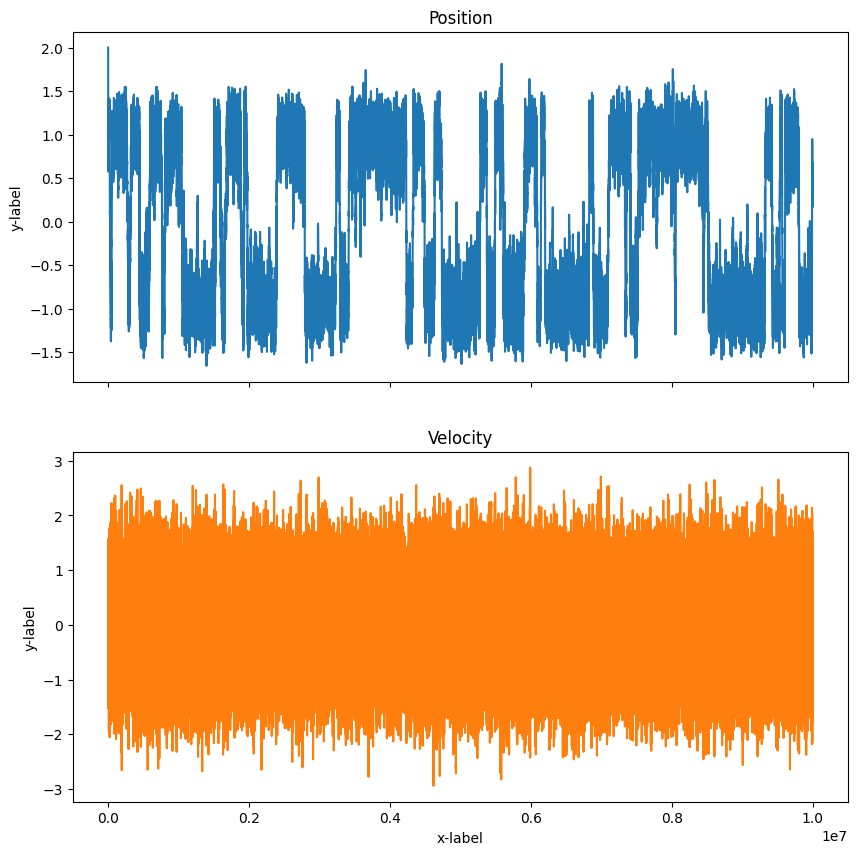

In [32]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(position_0)
axs[0].set_title('Position')
axs[1].plot(velocity_0, 'tab:orange')
axs[1].set_title('Velocity')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

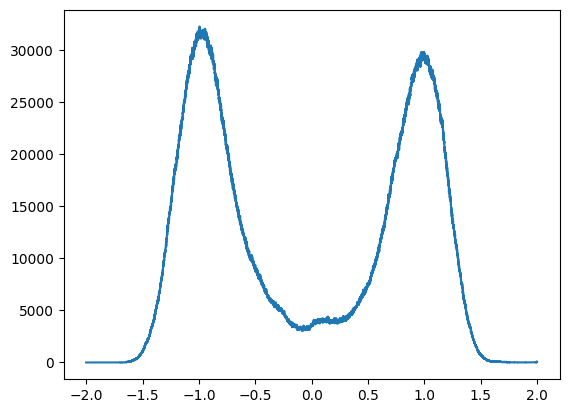

In [33]:
bins = np.linspace(-2*a, 2*a, 10000)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

density = np.histogram(positions, bins)

axs[0].plot(bins[0:-1], density[0])
axs[0].set_title('Position distribution')
